In [3]:
import pandas as pd

# Création du DataFrame
data = {
    "Chercheur 1": ["Alice", "Alice", "Bob", "Bob", "Charlie", "Alice", "Eve", "David", "Charlie"],
    "Chercheur 2": ["Bob", "Charlie", "Charlie", "David", "David", "Eve", "Frank", "Frank", "Eve"],
    "Nombre": [3, 1, 2, 1, 4, 2, 1, 3, 2]
}

df = pd.DataFrame(data)

# Affichage du DataFrame
print(df)

  Chercheur 1 Chercheur 2  Nombre
0       Alice         Bob       3
1       Alice     Charlie       1
2         Bob     Charlie       2
3         Bob       David       1
4     Charlie       David       4
5       Alice         Eve       2
6         Eve       Frank       1
7       David       Frank       3
8     Charlie         Eve       2


{('Alice', 'Bob'): Text(0.6493746903089164, -0.49823009502099824, '3'),
 ('Alice', 'Charlie'): Text(0.5936494876812315, -0.09340395278782987, '1'),
 ('Alice', 'Eve'): Text(0.6037692003072201, 0.38388624297015417, '2'),
 ('Bob', 'Charlie'): Text(0.2430215075170825, -0.5494227052346279, '2'),
 ('Bob', 'David'): Text(-0.21609527329603062, -0.6814375156642727, '1'),
 ('Charlie', 'David'): Text(-0.2718188384399911, -0.27661441297462375, '4'),
 ('Charlie', 'Eve'): Text(0.19741574694272712, 0.33269628780008365, '2'),
 ('David', 'Frank'): Text(-0.8467903751246892, 0.16554169792705786, '3'),
 ('Eve', 'Frank'): Text(-0.3775542042473754, 0.774844756594053, '1')}

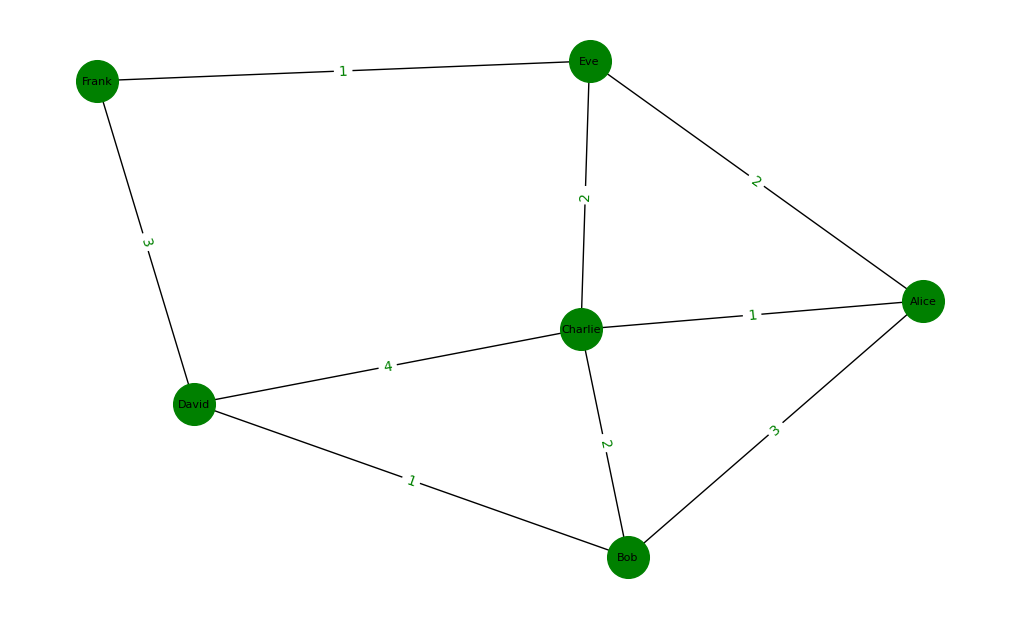

In [9]:
import networkx as nx
import matplotlib.pyplot as plt


G = nx.from_pandas_edgelist(df, source='Chercheur 1', target='Chercheur 2', edge_attr='Nombre')

plt.figure(figsize=(10, 6))
pos = nx.spring_layout(G, seed=42)  
nx.draw(G, pos, with_labels=True, node_size=900, node_color='green', font_size=8)

edge_labels = nx.get_edge_attributes(G, 'Nombre')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='green')

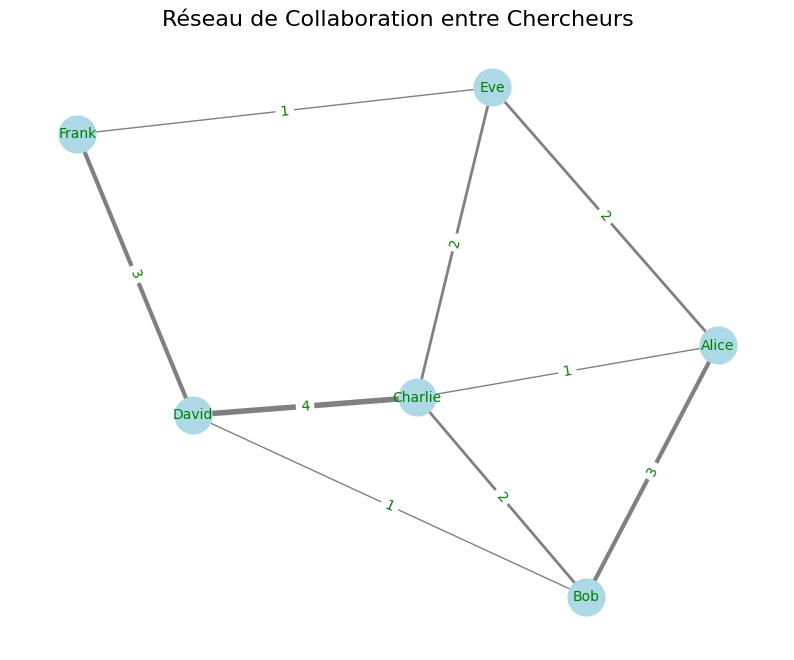

In [13]:
import networkx as nx
import matplotlib.pyplot as plt

# Les données des relations
relations = [
    ("Alice", "Bob", 3),
    ("Alice", "Charlie", 1),
    ("Bob", "Charlie", 2),
    ("Bob", "David", 1),
    ("Charlie", "David", 4),
    ("Alice", "Eve", 2),
    ("Eve", "Frank", 1),
    ("David", "Frank", 3),
    ("Charlie", "Eve", 2),
]

# Création du graphe
G = nx.Graph()

# Ajout des relations avec leurs poids (nombre de publications)
for source, target, weight in relations:
    G.add_edge(source, target, weight=weight)

# Positionnement des nœuds pour une visualisation claire ///////////
pos = nx.spring_layout(G, seed=42) # , seed=42 fix le graphe

# Dessin du graphe
plt.figure(figsize=(10, 8))

# Dessiner les nœuds
nx.draw_networkx_nodes(G, pos, node_size=700, node_color='lightblue')  

# Dessiner les arêtes (liens)
edges = G.edges(data=True)
nx.draw_networkx_edges(
    G,
    pos,
    edgelist=[(u, v) for u, v, d in edges],
    width=[d['weight'] for _, _, d in edges],
    edge_color='gray'
)

# Ajouter les étiquettes aux nœuds
nx.draw_networkx_labels(G, pos, font_size=10, font_color='green')

# Ajouter les poids des arêtes comme étiquettes
edge_labels = {(u, v): d['weight'] for u, v, d in edges}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='green')

# Titre et affichage
plt.title("Réseau de Collaboration entre Chercheurs", fontsize=16)
plt.axis('off')  # Désactiver les axes
plt.show()
